# IEEE Coders Week
### Day 6 : Deploying model using Flask (Purchasing Ads Classifier Model)
#### By : Fahmi Jabbar (rootmawar77@gmail.com)
---
**Disclaimer**

All of the work result below is done by me, based on every resources that have been given. Please contact me if you have any good suggestion.


## Making Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget --no-check-certificate \
http://iali.in/datasets/Social_Network_Ads.csv \
  -O /content/SNA.csv

--2020-06-08 05:47:35--  http://iali.in/datasets/Social_Network_Ads.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘/content/SNA.csv’

/content/SNA.csv    100%[===================>]  10.67K  --.-KB/s    in 0s      

2020-06-08 05:47:36 (167 MB/s) - ‘/content/SNA.csv’ saved [10926/10926]



In [3]:
print("Visualizing the table")
df = pd.read_csv('/content/SNA.csv')
df.head()

Visualizing the table


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
X = df.iloc[:, [2, 3]].values #select age and salary
Y = df.iloc[:,4].values #select purchased
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [5]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Decission Tree accuracy: 90.0 %


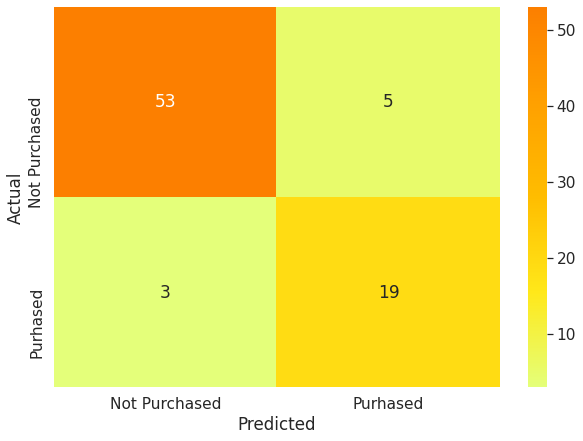

In [6]:
labels = ["Not Purchased", "Purhased"]
y_pred = model.predict(X_test)

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})
print('Decission Tree accuracy:', accuracy_score(y_test, y_pred)*100 ,"%")

In [7]:
test_predict = np.array([[20, 150000]])

model.predict(test_predict)

array([1])

Where 0 is Not Purchased 

And 1 is Purchased

## Saving Model & Deployments

In [8]:
!pip install flask-ngrok

In [9]:
from flask import Flask, jsonify, make_response, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def putStatus():
    return "Status: Running and Active..."

@app.route('/predict',methods=['POST'])
def getPredictions():
  data = request.get_json(force=True)
  age = str(data['Age'])
  sal = str(data['Salary'])
  test = np.array([[age,sal]])
  prediction = model.predict(test)
  output = prediction[0]
  if (output == 0):
    return "He/She's not gonna purchase it!"
  else :
    return "He/She's gonna purchase it!"
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5e7ca1bc07c4.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [08/Jun/2020 05:48:03] "POST /predict HTTP/1.1" 200 -


The testing file is in another file with (Testing) name